In [1]:
# import commonly used libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

In [2]:
# import dataset

df = pd.read_csv('train.csv')
df.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [3]:
# VAD GÖR DEN HÄR?!?
nan_total = sum(list(df.isnull().sum()))

print("Dataset length: " + str(len(df)))
print("Total number of missing values: " + str(nan_total) + "\n")

df.info()

Dataset length: 1039
Total number of missing values: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female             

In [4]:
print("Listing all features and how many enries there are of each feature\n")
for col in df.columns:
    print("\033[1m" + col + "\033[0m")
    print(df[col].value_counts())
    print("\n")

Listing all features and how many enries there are of each feature

Number words female
0       21
1688     4
1154     3
972      3
1120     3
        ..
3266     1
1217     1
1215     1
3262     1
7110     1
Name: Number words female, Length: 895, dtype: int64


Total words
8611     3
7074     3
10944    2
7421     2
4555     2
        ..
23842    1
5409     1
3358     1
11547    1
8192     1
Name: Total words, Length: 1008, dtype: int64


Number of words lead
789.0     3
3976.0    3
2498.0    3
9028.0    2
1686.0    2
         ..
4001.0    1
3160.0    1
2460.0    1
1133.0    1
3424.0    1
Name: Number of words lead, Length: 964, dtype: int64


Difference in words lead and co-lead
622      4
694      4
503      3
3200     3
519      3
        ..
25822    1
2556     1
1242     1
3289     1
1        1
Name: Difference in words lead and co-lead, Length: 951, dtype: int64


Number of male actors
6     120
5     115
4     111
7     111
8     109
9      88
10     78
11     57
3      52
12  

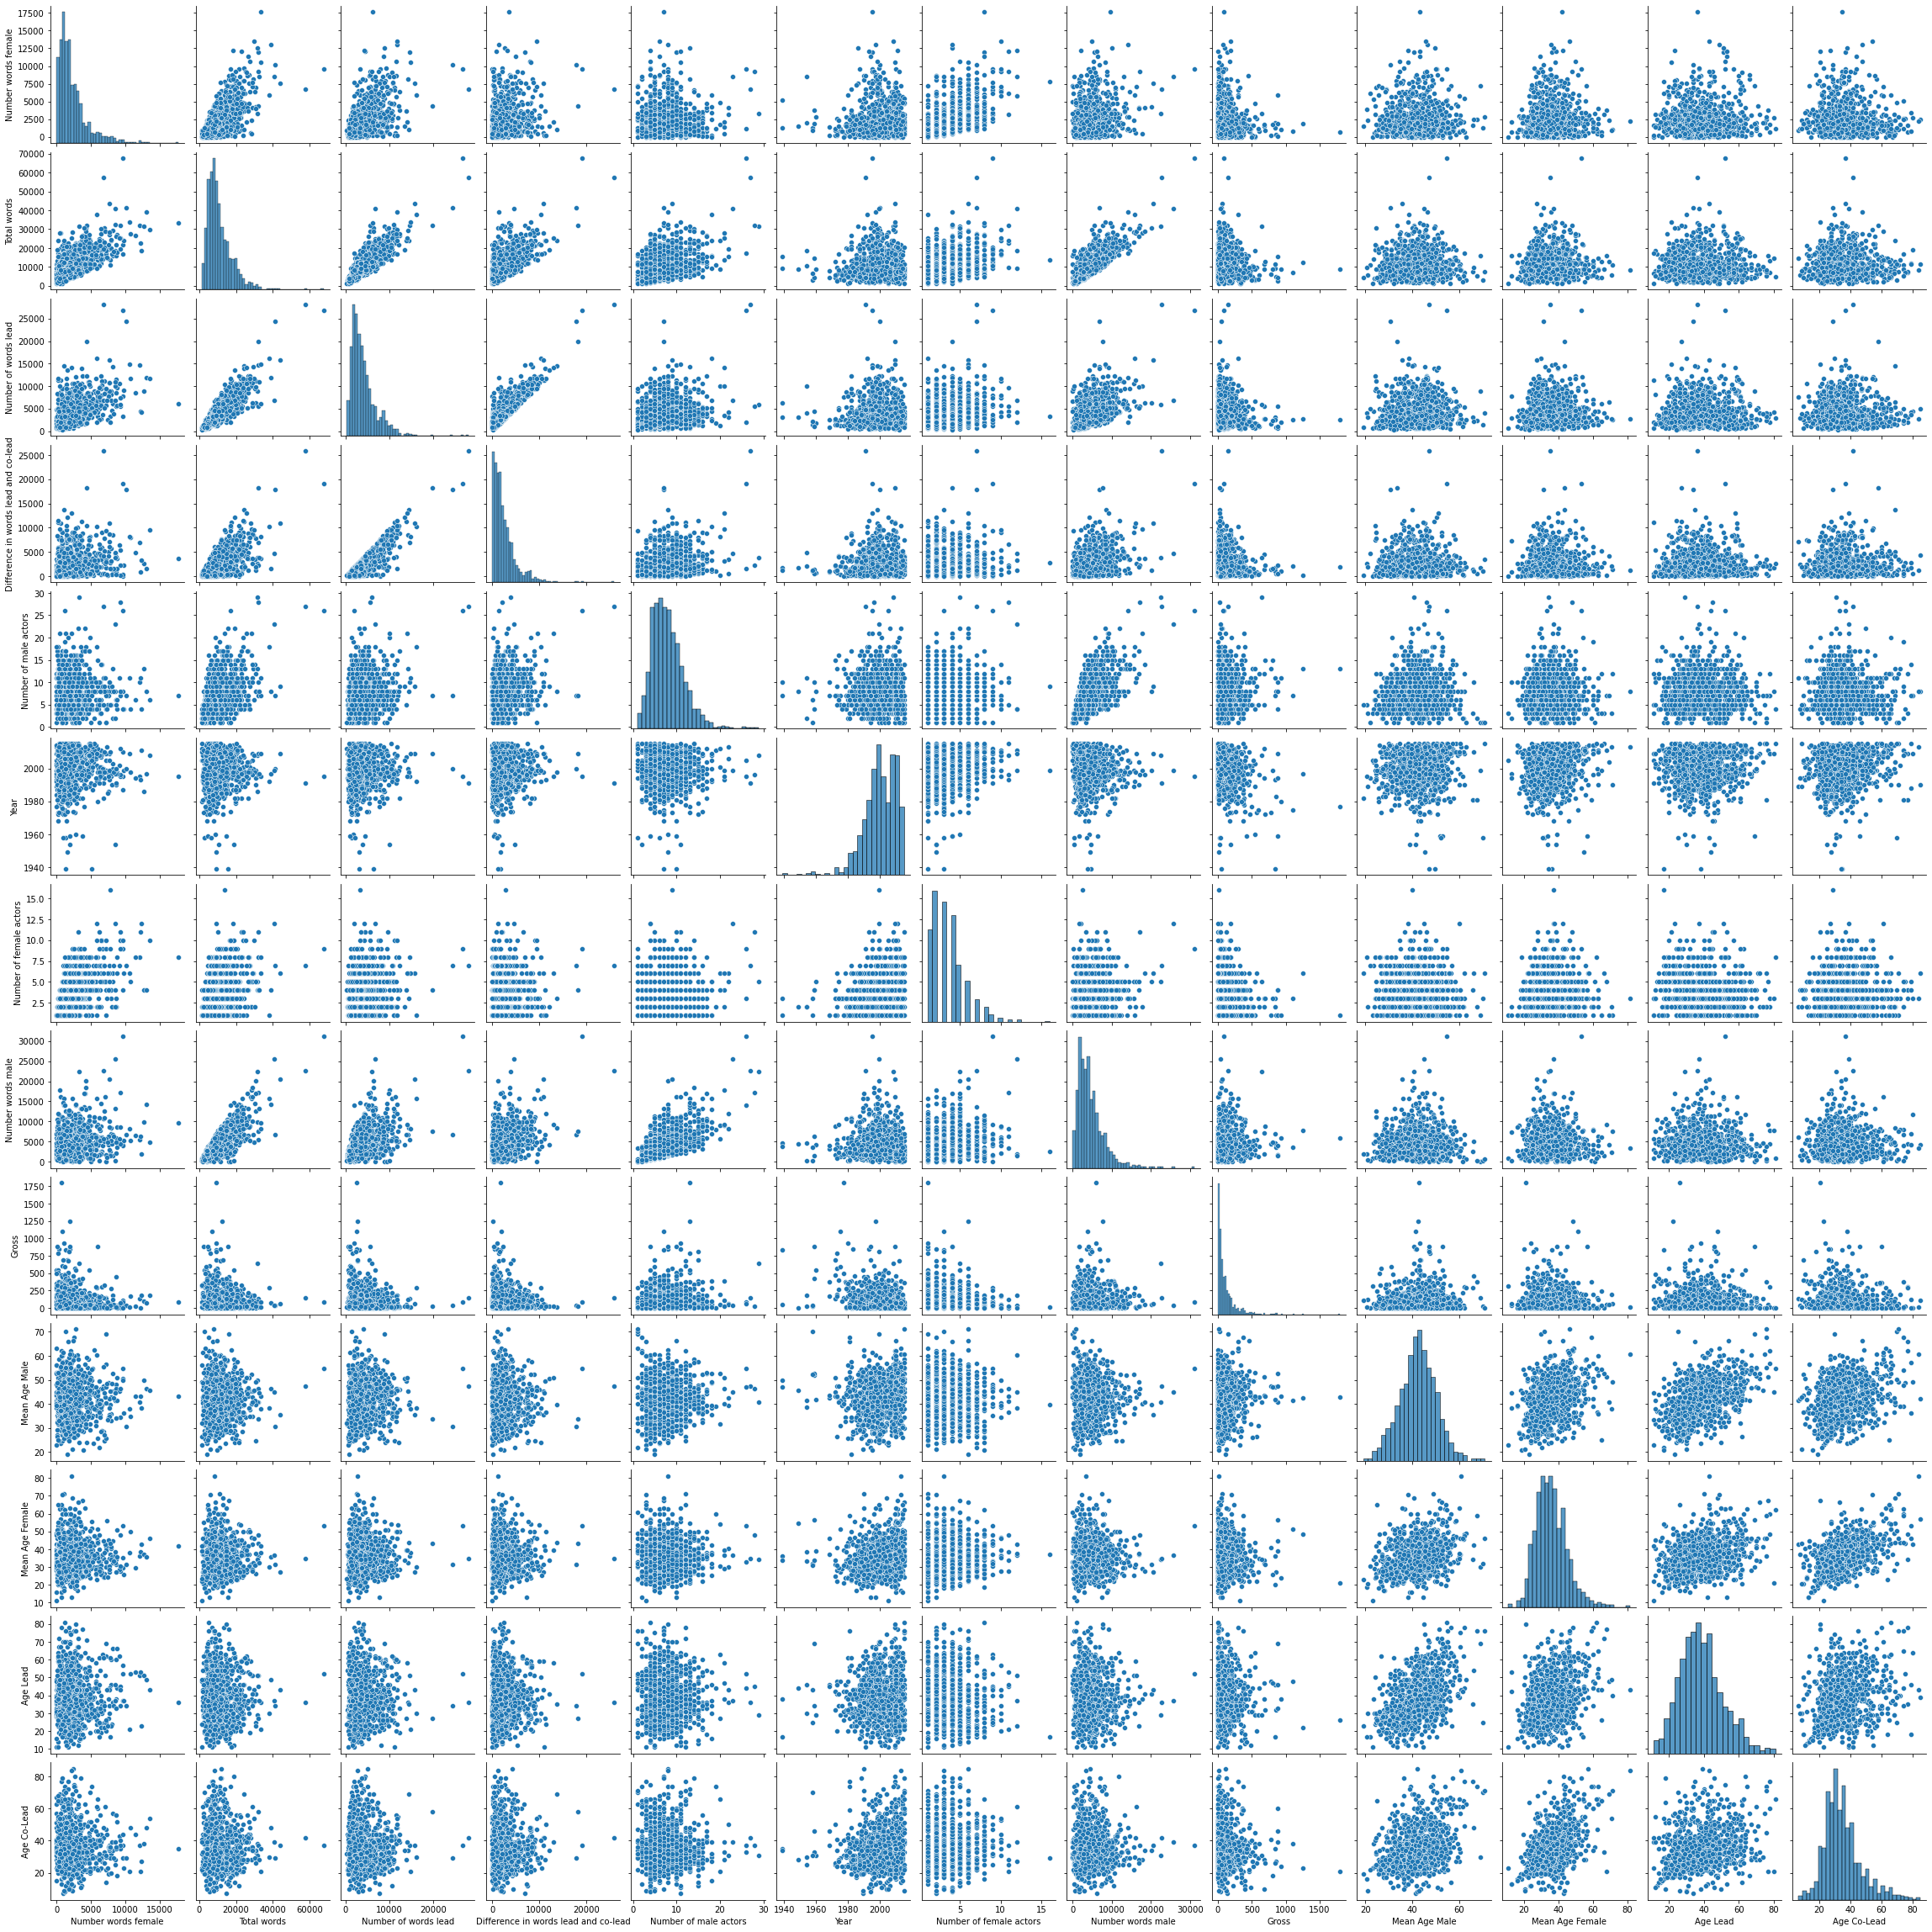

In [5]:
# plot distribution of data

sns.pairplot(df)
plt.show()

# Splitting Training and Test

In [6]:
# split into training and test set 
from sklearn.model_selection import train_test_split

features = df.drop(['Lead'], axis=1)
labels = df['Lead']


X_train, X_test, y_train, y_test = train_test_split(
     features, labels, train_size=0.8
)

## Logaristic Regression

In [9]:
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from itertools import combinations, chain
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


#clf = LogisticRegression(random_state=0).fit(X_train, y_train)
logreg=LogisticRegression()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
model = skl_lm.LogisticRegression(solver='lbfgs', max_iter=10000, C=1,penalty="l2")
model.fit(X_train, y_train)


logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [10]:
score_LGR = model.score(X_test, y_test)
score_LGR

0.8605769230769231

## Gridsearch of Logistic regression

In [11]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.8194779116465863


## Cross-validation & Feature

In [12]:
def find_best_subset(estimator, X, y, max_size=8, cv=5, print_progress=False):
    """
    Calculates the best model of up to max_size features of X.
    estimator must have a fit and score functions.
    X must be a DataFrame.
    Source of function: https://stackoverflow.com/a/50704252/6400551
    """

    n_features = X.shape[1]
    subsets = (combinations(range(n_features), k + 1)
               for k in range(min(n_features, max_size)))

    subsets_2 = (combinations(range(n_features), k + 1)
                 for k in range(min(n_features, max_size)))

    best_size_subset = []

    progress_percentage = 0
    progress = 0
    # total_combinations = sum(math.comb(n_features, size) for size in range(max_size + 1))
    total_combinations = 0

    for subsets_k in subsets_2:
        for subset in subsets_k:
            total_combinations += 1

    if print_progress:
        print(f"Looking through {total_combinations} combinations...")

    for subsets_k in subsets:  # for each list of subsets of the same size
        best_score = -np.inf
        best_subset = None

        for subset in subsets_k:
            if print_progress:
                progress += 1

                percentage = 100.0 * (progress / float(total_combinations))
                percentage_int = int(percentage)

                if percentage_int > progress_percentage:
                    progress_percentage = percentage_int
                    print(f"Progress: {progress_percentage}%")

            estimator.fit(X.iloc[:, list(subset)], y)
            # get the subset with the best score among subsets of the same size
            score = estimator.score(X.iloc[:, list(subset)], y)
            if score > best_score:
                best_score, best_subset = score, subset

        # to compare subsets of different sizes we must use CV
        # first store the best subset of each size
        best_size_subset.append(best_subset)

    # compare best subsets of each size
    best_score = -np.inf
    best_subset = None
    list_scores = []
    for subset in best_size_subset:
        score = cross_val_score(estimator, X.iloc[:, list(subset)], y, cv=cv).mean()
        list_scores.append(score)
        if score > best_score:
            best_score, best_subset = score, subset

    return best_subset, best_score, best_size_subset, list_scores

In [13]:
best_set, best_score, best_size_subset, list_scores = \
            find_best_subset(model, features, labels)

print(f"Best subset: {best_set}")
print(f"Best score: {best_score}")
print(f"Best size subset: {best_size_subset}")
print(f"List of scores: {list_scores}")

Best subset: (0, 1, 2, 3, 4, 6, 11, 12)
Best score: 0.871971386101821
Best size subset: [(6,), (4, 6), (0, 4, 6), (0, 2, 3, 6), (0, 2, 3, 4, 6), (0, 1, 3, 4, 6, 7), (0, 1, 3, 4, 6, 11, 12), (0, 1, 2, 3, 4, 6, 11, 12)]
List of scores: [0.7536185432924564, 0.7796172426607209, 0.8152406168710516, 0.8286649944258639, 0.8508361204013377, 0.8537207357859533, 0.8642837235228539, 0.871971386101821]
